# **Análisis Exploratorio de Datos (E.D.A.)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

%matplotlib inline



In [2]:
# Generando el df del archivo con todos los títulos de todas las plataformas
df_data_titles  = pd.read_csv('datasets/full_titles.csv')

df_data_titles.head(2)

,id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,platform,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,amazon,3.467131
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,amazon,3.548682


In [3]:
# Generando el df del archivo con todas las calificaciones de los usuarios
df_data_scores  = pd.read_csv('datasets/full_scores.csv')

df_data_scores.head(2)

,userId,score,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186


## **Análisis Dataframe de Títulos**

In [4]:
df_data_titles.shape

(22998, 15)

In [5]:
df_data_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       22998 non-null  object 
 4   cast           22998 non-null  object 
 5   country        22998 non-null  object 
 6   date_added     22998 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration_int   22998 non-null  int64  
 10  duration_type  22998 non-null  object 
 11  listed_in      22998 non-null  object 
 12  description    22998 non-null  object 
 13  platform       22998 non-null  object 
 14  score          22998 non-null  float64
dtypes: float64(1), int64(2), object(12)
memory usage: 2.6+ MB


In [6]:
df_data_titles.isnull().sum()


id               0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration_int     0
duration_type    0
listed_in        0
description      0
platform         0
score            0
dtype: int64

In [7]:
# Analizando datos duplicados
df_data_titles.duplicated().sum()

0

In [8]:
prof_movies = ProfileReport(df_data_titles)

prof_movies

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

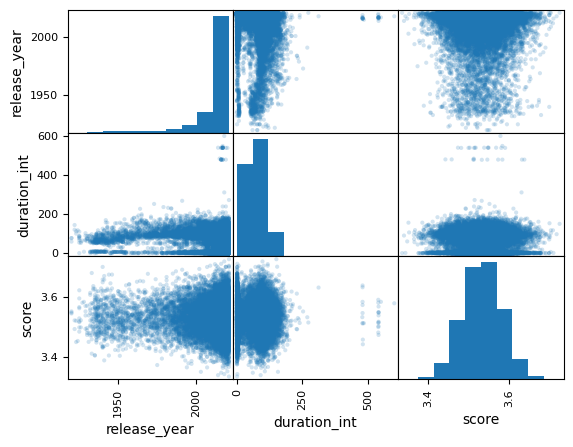

In [9]:
# Realizando un histograma 
pd.plotting.scatter_matrix(df_data_titles, alpha=0.2) 

plt.show()

In [10]:
"""
# Verificando incidencia de valores nulos (no es necesario porque fueron completados todos los valores nulos con el string "no data")
porcentaje = (df_data_titles.director.isnull().sum() / len(df_data_titles)) * 100
print('Porcentaje de valores nulos: {:.2f}%'.format(porcentaje))
"""

'\n# Verificando incidencia de valores nulos (no es necesario porque fueron completados todos los valores nulos con el string "no data")\nporcentaje = (df_data_titles.director.isnull().sum() / len(df_data_titles)) * 100\nprint(\'Porcentaje de valores nulos: {:.2f}%\'.format(porcentaje))\n'

In [11]:
# Verificando cantidad de valores únicos Campo director
df_data_titles.director.value_counts()

no data                  8259
mark knight               113
cannis holder              61
jay chapman                46
moonbug entertainment      37
                         ... 
charles wilkinson           1
dominic brunt               1
sean breathnach             1
cindy jansen                1
mozez singh                 1
Name: director, Length: 10096, dtype: int64

In [12]:
# Verificando cantidad de valores únicos Campo duration_int
df_data_titles.duration_int.value_counts(ascending=False)


1      4236
2      1025
3       492
90      438
91      428
       ... 
479       1
601       1
485       1
550       1
201       1
Name: duration_int, Length: 225, dtype: int64

In [13]:
# Contando valores en cero (0) de la columna duration_int
count_zeros_d = (df_data_titles['duration_int'] == 0).sum()
count_zeros_d

197

## **Análisis Dataframe de Scores**

In [14]:
df_data_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   score      float64
 2   timestamp  object 
 3   movieId    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 336.4+ MB


In [15]:
df_data_scores.shape

(11024289, 4)

In [16]:
# Visualizando los datos del dataframe
df_data_scores.head()

,userId,score,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


In [17]:
# Renombrando la columna id para que sea más simple relacionarla posteriormente
df_data_scores = df_data_scores.rename(columns={'movieid': 'id'})

In [18]:
# Contando la cantidad de usuarios únicos
df_data_scores['userId'].nunique()

115077

In [19]:
# Verificando valores nulos
df_data_scores.isnull().sum()

userId       0
score        0
timestamp    0
movieId      0
dtype: int64

In [20]:
# Verificando valores duplicados
df_data_scores.duplicated().sum()


10466

In [21]:
# Eliminando los valores duplicados
df_data_scores.drop_duplicates(inplace=True)

In [22]:
# Verificando el proceso anterior
df_data_scores.duplicated().sum()

0

In [ ]:
# Guardando el df modificado
df_data_scores.to_csv('datasets/full_scores.csv', index = False)